# Backtesting on Apple daily trading data
## Author: Liam Gao


## This notebook contains following steps:
### 1. Upload the data (provided with alongside the notebook)
### 2. Calculate fast and slow moving averages
### 3  Apply Moving Average Crossover Strategy
### 4. Calculate daily returns
### 5. Plot moving averages and crossover points


## Load required Python packages

In [13]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt

## 1. Load Apple daily trading data

In [14]:
apple_trading_data = pd.read_csv("./Apple_Stock_price.csv", index_col=[0])

### Check the Adjusted close prices column

In [15]:
apple_trading_data["AAPL.Adjusted"]

1         2.562706
2         2.619588
3         2.600933
4         2.613777
5         2.830903
           ...    
3811    167.300003
3812    164.320007
3813    160.070007
3814    162.740005
3815    164.850006
Name: AAPL.Adjusted, Length: 3815, dtype: float64

## 2. Calculate moving averages on Adjusted close price

### Define a function for computing moving averages

In [25]:
def moving_avg(ts, window_size):
    '''
    calculate moving averages based on data and window size
    '''
    
    data_length = len(ts)
    MA = np.empty(data_length)
    MA[:] = np.nan
    for i in range(window_size-1, data_length):
        MA[i] = sum(ts[i-window_size+1:i+1])/window_size
        
    return(MA)

### Calculate fast moving average with typical window size at 50

In [17]:
fast_MA = moving_avg(apple_trading_data["AAPL.Adjusted"], 50)

### Calculate slow moving average with typical window size at 200

In [18]:
slow_MA = moving_avg(apple_trading_data["AAPL.Adjusted"], 200)

## 3. Implement buy/sell signals using Moving Average Crossover Strategy

### Add Signal column

In [19]:
apple_trading_data["signal"] = np.sign(fast_MA - slow_MA)

### Identify crossovers

In [20]:
# ignore the first 200 NaN values
cross_over = np.where(np.diff(np.sign(apple_trading_data["signal"])))[0][199:]

### Store crossover points

In [21]:
buy=[]
sell=[]
for i in cross_over:
    if apple_trading_data["signal"][i] == -1:
        buy.append(i)
    if apple_trading_data["signal"][i] == 1:
        sell.append(i)


## 4. Calculate daily returns
### Add Lagged price column that is based on Adjusted price

In [22]:
apple_trading_data["lagged_price"] = apple_trading_data["AAPL.Adjusted"].shift(1)

### Equation for calculating daily returns
## $ \frac{P_t}{P_{t-1}} -1 $

### Calculate daily returns column

In [23]:
apple_trading_data["dailyReturns"] = apple_trading_data["AAPL.Adjusted"] / apple_trading_data["lagged_price"] - 1

## 6. Plot moving average lines and returns

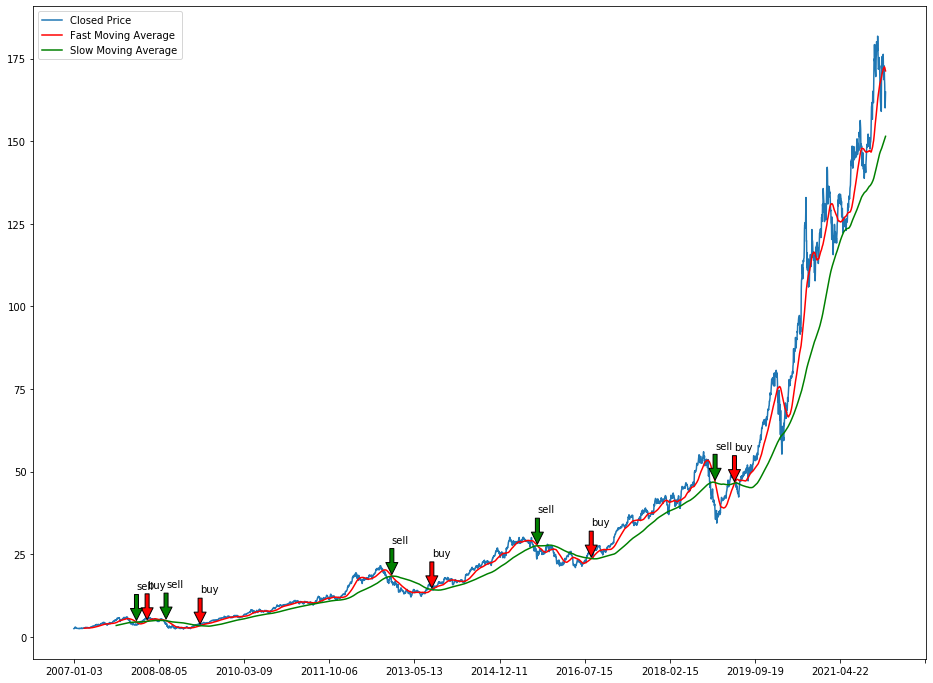

In [24]:
fig1 = plt.figure(figsize=(16, 12))
ax1 = fig1.gca()
ax1.plot(apple_trading_data["Date"], apple_trading_data["AAPL.Adjusted"],  label = "Closed Price")
ax1.plot(apple_trading_data["Date"], fast_MA, 'r', label = "Fast Moving Average")
ax1.plot(apple_trading_data["Date"], slow_MA, 'g', label = "Slow Moving Average")
for i in buy:
    ax1.annotate('buy', xy=(i, fast_MA[i]), xytext=(i, fast_MA[i]+10),
            arrowprops=dict(facecolor='red', shrink=0.05))
for i in sell:
    ax1.annotate('sell', xy=(i, fast_MA[i]), xytext=(i, fast_MA[i]+10),
            arrowprops=dict(facecolor='green', shrink=0.05))    
ax1.legend()
ax1.xaxis.set_major_locator(plt.MaxNLocator(12))
plt.show()